## Homework
> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
unzip bank+marketing.zip 
unzip bank.zip
```

We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not. 

### Dataset preparation

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`



Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`


### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`


In [15]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [16]:
import pandas as pd

df = pd.read_csv('../03-classification/bank/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
df.shape


(45211, 17)

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

# 選擇指定的列
selected_columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df_selected = df[selected_columns]

# 將目標變數 'y' 轉換為數值型
df_selected['y'] = (df_selected['y'] == 'yes').astype(int)

# 分割資料集為訓練集和臨時測試集
train_data, temp_test, train_labels, temp_labels = train_test_split(
    df_selected.drop('y', axis=1),
    df_selected['y'],
    test_size=0.4,
    random_state=1
)

# 進一步分割臨時測試集為驗證集和測試集
val_data, test_data, val_labels, test_labels = train_test_split(
    temp_test,
    temp_labels,
    test_size=0.5,
    random_state=1
)

print("訓練集大小:", train_data.shape[0])
print("驗證集大小:", val_data.shape[0])
print("測試集大小:", test_data.shape[0])


訓練集大小: 27126
驗證集大小: 9042
測試集大小: 9043


C:\Users\wufen\AppData\Local\Temp\ipykernel_16480\4219311076.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['y'] = (df_selected['y'] == 'yes').astype(int)


'age' 被反轉
'day' 被反轉
'campaign' 被反轉

特徵重要性 (基於ROC AUC):
duration: 0.813
previous: 0.599
balance: 0.592
pdays: 0.590
campaign: 0.574
day: 0.529
age: 0.513


C:\Users\wufen\AppData\Local\Temp\ipykernel_16480\1757984045.py:40: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.tight_layout()
C:\Users\wufen\AppData\Local\Temp\ipykernel_16480\1757984045.py:40: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from current font.
  plt.tight_layout()
C:\Users\wufen\AppData\Local\Temp\ipykernel_16480\1757984045.py:40: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  plt.tight_layout()
C:\Users\wufen\AppData\Local\Temp\ipykernel_16480\1757984045.py:40: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  plt.tight_layout()
C:\Users\wufen\AppData\Local\Temp\ipykernel_16480\1757984045.py:40: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  plt.tight_layout()
C:\Users\wufen\AppData\Local\Temp\ipykernel_16480\1757984045.py:40: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) miss

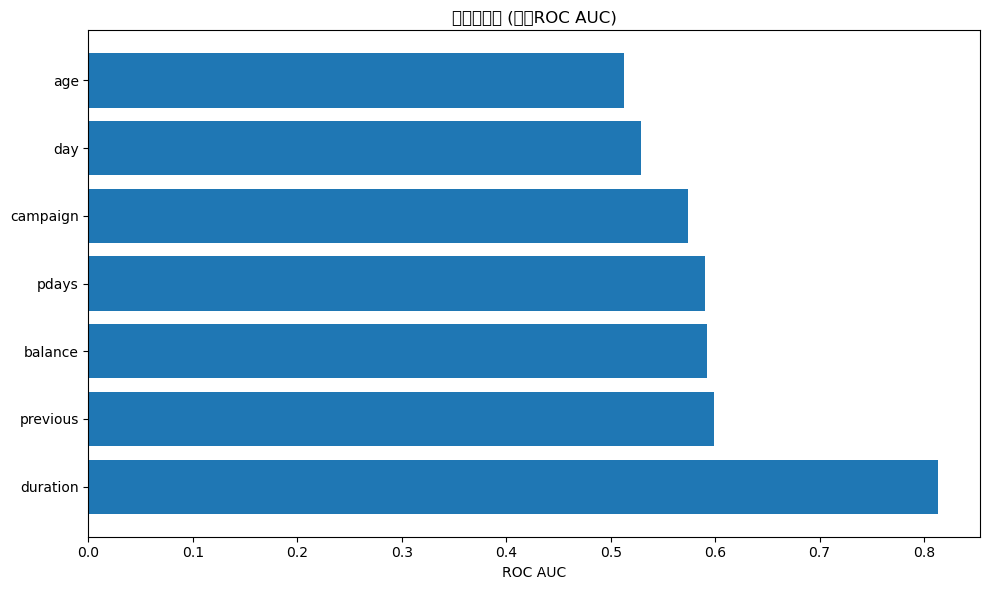

In [19]:
# 導入所需的庫
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

# 定義一個函數來計算AUC並在需要時反轉變量
def calculate_auc(feature, labels):
    auc = roc_auc_score(labels, feature)
    if auc < 0.5:
        return roc_auc_score(labels, -feature), True
    return auc, False

# 獲取數值型變量列表
numerical_columns = train_data.select_dtypes(include=[np.number]).columns

# 計算每個數值型變量的AUC
auc_scores = {}
for col in numerical_columns:
    auc, inverted = calculate_auc(train_data[col], train_labels)
    auc_scores[col] = auc
    if inverted:
        print(f"'{col}' 被反轉")

# 按AUC降序排序特徵
sorted_features = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)

# 打印結果
print("\n特徵重要性 (基於ROC AUC):")
for feature, auc in sorted_features:
    print(f"{feature}: {auc:.3f}")

# 可視化特徵重要性
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
features, aucs = zip(*sorted_features)
plt.barh(features, aucs)
plt.xlabel('ROC AUC')
plt.title('特徵重要性 (基於ROC AUC)')
plt.tight_layout()
plt.show()



### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99


In [20]:
# 導入必要的庫
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 準備訓練和驗證數據
train_dict = train_data.to_dict(orient='records')
val_dict = val_data.to_dict(orient='records')

# 使用 DictVectorizer 進行 one-hot 編碼
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

# 訓練邏輯回歸模型
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, train_labels)

# 在驗證集上進行預測
y_pred = model.predict_proba(X_val)[:, 1]

# 計算 AUC
auc = roc_auc_score(val_labels, y_pred)

print(f"驗證集上的 AUC: {auc:.3f}")



驗證集上的 AUC: 0.900




### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865


c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.c

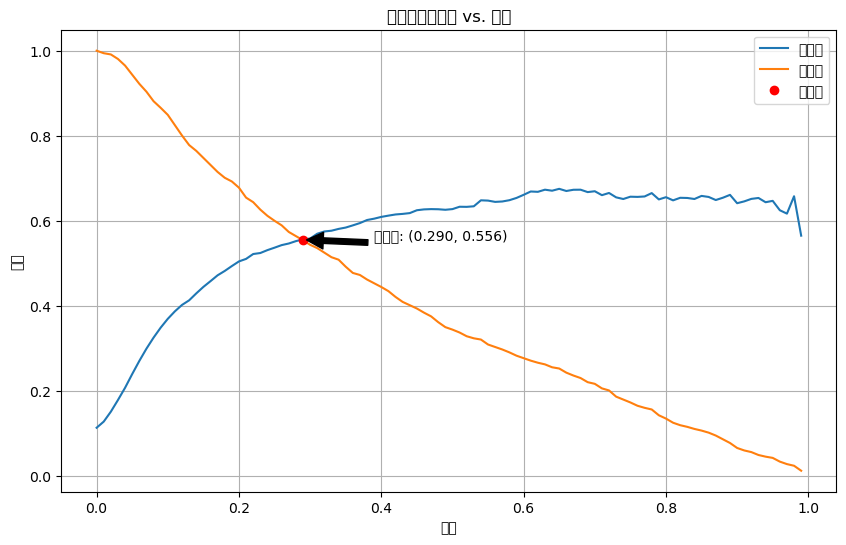

精確度和召回率曲線的交叉點閾值: 0.290


In [21]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

# 生成閾值範圍
thresholds = np.arange(0, 1.0, 0.01)

# 初始化精確度和召回率列表
precisions = []
recalls = []

# 計算每個閾值的精確度和召回率
for threshold in thresholds:
    # 將預測概率轉換為二元預測
    y_pred_binary = (y_pred >= threshold).astype(int)
    
    # 計算精確度和召回率
    precision = precision_score(val_labels, y_pred_binary)
    recall = recall_score(val_labels, y_pred_binary)
    
    precisions.append(precision)
    recalls.append(recall)

# 繪製精確度-召回率曲線
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='精確度')
plt.plot(thresholds, recalls, label='召回率')
plt.xlabel('閾值')
plt.ylabel('分數')
plt.title('精確度和召回率 vs. 閾值')
plt.legend()
plt.grid(True)

# 找到精確度和召回率曲線的交叉點
intersection_idx = np.argmin(np.abs(np.array(precisions) - np.array(recalls)))
intersection_threshold = thresholds[intersection_idx]
intersection_value = (precisions[intersection_idx] + recalls[intersection_idx]) / 2

plt.plot(intersection_threshold, intersection_value, 'ro', label='交叉點')
plt.annotate(f'交叉點: ({intersection_threshold:.3f}, {intersection_value:.3f})',
             xy=(intersection_threshold, intersection_value),
             xytext=(intersection_threshold+0.1, intersection_value),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.show()

print(f"精確度和召回率曲線的交叉點閾值: {intersection_threshold:.3f}")




### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62


c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wufen\.conda\envs\fe\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


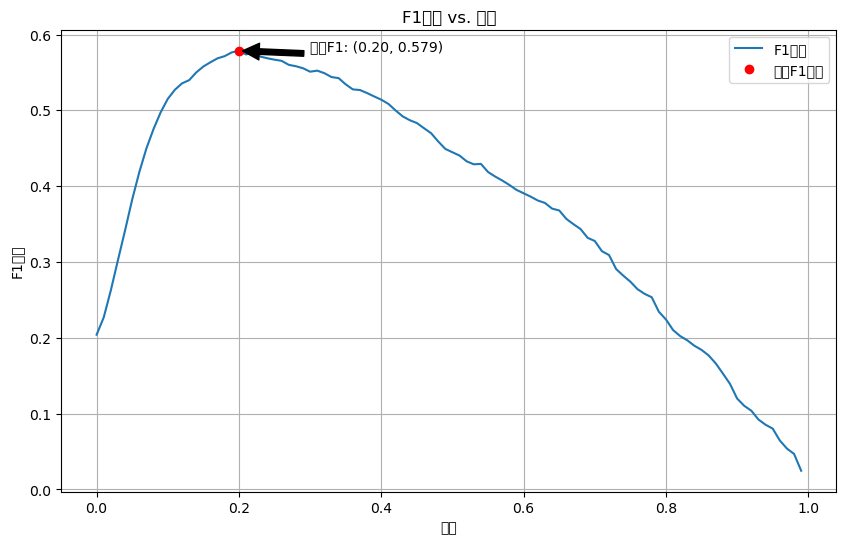

最大F1分數: 0.579
對應的閾值: 0.20


In [22]:
# 計算F1分數
f1_scores = []

for precision, recall in zip(precisions, recalls):
    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
    f1_scores.append(f1)

# 找到最大F1分數及其對應的閾值
max_f1_index = np.argmax(f1_scores)
max_f1 = f1_scores[max_f1_index]
max_f1_threshold = thresholds[max_f1_index]

# 繪製F1分數曲線
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1分數')
plt.xlabel('閾值')
plt.ylabel('F1分數')
plt.title('F1分數 vs. 閾值')
plt.grid(True)

# 標記最大F1分數點
plt.plot(max_f1_threshold, max_f1, 'ro', label='最大F1分數')
plt.annotate(f'最大F1: ({max_f1_threshold:.2f}, {max_f1:.3f})',
             xy=(max_f1_threshold, max_f1),
             xytext=(max_f1_threshold+0.1, max_f1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.show()

print(f"最大F1分數: {max_f1:.3f}")
print(f"對應的閾值: {max_f1_threshold:.2f}")




### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26



In [23]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 準備特徵和目標變數
X =df_selected.drop('y', axis=1)# train_data #df_selected.drop('y', axis=1)
y =df_selected['y']#  train_labels#df_selected['y']

# 初始化 KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# 儲存每個折疊的 AUC 分數
auc_scores = []

# 迭代每個折疊
# for train_index, val_index in kf.split(X):
#     # 分割資料為訓練集和驗證集
#     X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
#     # 訓練模型
#     model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
#     model.fit(X_train, y_train)
    
#     # 在驗證集上進行預測
#     y_pred = model.predict_proba(X_val)[:, 1]
    
#     # 計算 AUC 分數
#     auc = roc_auc_score(y_val, y_pred)
#     auc_scores.append(auc)

# # 計算 AUC 分數的標準差
# std_dev = np.std(auc_scores)

# print(f"AUC 分數: {auc_scores}")
# print(f"AUC 分數的標準差: {std_dev:.6f}")




In [24]:
X.shape,y.shape


((45211, 14), (45211,))

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

# 假設 X 是您的特徵數據框，y 是目標變量

# 識別分類變量和數值變量
categorical_features = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# 創建預處理器
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# 創建管道
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000))
])

# 初始化 KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# 儲存每個折疊的 AUC 分數
auc_scores = []

# 迭代每個折疊
for train_index, val_index in kf.split(X):
    # 分割數據為訓練集和驗證集
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # 訓練模型
    pipeline.fit(X_train, y_train)
    
    # 在驗證集上進行預測
    y_pred = pipeline.predict_proba(X_val)[:, 1]
    
    # 計算 AUC 分數
    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)

# 計算 AUC 分數的平均值和標準差
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

print(f"平均 AUC: {mean_auc:.3f} (±{std_auc:.3f})")

平均 AUC: 0.906 (±0.004)



### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw04
* If your answer doesn't match options exactly, select the closest one

In [26]:
# # 初始化 KFold
# kf = KFold(n_splits=5, shuffle=True, random_state=1)

# # 定義 C 值列表
# C_values = [0.000001, 0.001, 1]

# # 儲存每個 C 值的結果
# results = []

# for C in C_values:
#     auc_scores = []
    
#     # 創建邏輯回歸模型
#     model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    
#     # 進行 5 折交叉驗證
#     for train_index, val_index in kf.split(X):
#         X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#         y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
#         # 訓練模型
#         model.fit(X_train, y_train)
        
#         # 在驗證集上進行預測
#         y_pred = model.predict_proba(X_val)[:, 1]
        
#         # 計算 AUC 分數
#         auc = roc_auc_score(y_val, y_pred)
#         auc_scores.append(auc)
    
#     # 計算平均 AUC 和標準差
#     mean_auc = np.mean(auc_scores)
#     std_auc = np.std(auc_scores)
    
#     # 將結果添加到列表中
#     results.append({
#         'C': C,
#         'mean_auc': round(mean_auc, 3),
#         'std_auc': round(std_auc, 3)
#     })

# # 顯示結果
# for result in results:
#     print(f"C = {result['C']}: 平均 AUC = {result['mean_auc']:.3f} (±{result['std_auc']:.3f})")

# # 找出最佳 C 值
# best_result = max(results, key=lambda x: (x['mean_auc'], -x['std_auc'], -x['C']))
# print(f"\n最佳 C 值: {best_result['C']}")
# print(f"最佳平均 AUC: {best_result['mean_auc']:.3f} (±{best_result['std_auc']:.3f})")


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

# 假設 X 是您的特徵數據框，y 是目標變量

# 識別分類變量和數值變量
categorical_features = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# 初始化 KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# 定義 C 值列表
C_values = [0.000001, 0.001, 1]

# 儲存每個 C 值的結果
results = []

for C in C_values:
    auc_scores = []
    
    # 創建預處理器
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(drop='first'), categorical_features)
        ])
    
    # 創建包含預處理和邏輯回歸的管道
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', C=C, max_iter=1000))
    ])
    
    # 進行 5 折交叉驗證
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # 訓練模型（包括預處理）
        pipeline.fit(X_train, y_train)
        
        # 在驗證集上進行預測
        y_pred = pipeline.predict_proba(X_val)[:, 1]
        
        # 計算 AUC 分數
        auc = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc)
    
    # 計算平均 AUC 和標準差
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    # 將結果添加到列表中
    results.append({
        'C': C,
        'mean_auc': round(mean_auc, 3),
        'std_auc': round(std_auc, 3)
    })

# 顯示結果
for result in results:
    print(f"C = {result['C']}: 平均 AUC = {result['mean_auc']:.3f} (±{result['std_auc']:.3f})")

# 找出最佳 C 值
best_result = max(results, key=lambda x: (x['mean_auc'], -x['std_auc'], -x['C']))
print(f"\n最佳 C 值: {best_result['C']}")
print(f"最佳平均 AUC: {best_result['mean_auc']:.3f} (±{best_result['std_auc']:.3f})")

C = 1e-06: 平均 AUC = 0.816 (±0.003)
C = 0.001: 平均 AUC = 0.887 (±0.003)
C = 1: 平均 AUC = 0.906 (±0.004)

最佳 C 值: 1
最佳平均 AUC: 0.906 (±0.004)
